# Einlesen und vorbereiten der Daten
Einlesen der CSV in Dataframe und Ausgabe der einiger Zeilen

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = "datasets/1run_225_end_compression_particle-data.csv"

# Read the CSV into a pandas DataFrame
df = pd.read_csv(filename, skiprows=[1])  # Skip the first row with the "time (s)" information

df.sample(5)

,Tensile Stress,Particle ID From,Shear Stress,Coordinate : Y,von Mises Stress,Coordinate : X,Coordinate : Z,Particle ID To
43337,0.00,16587.0,13919.00,0.000087,24108.40,-2.291300e-05,0.000035,78972.0
4449,1196.01,57056.0,22002.10,-0.000050,38127.50,-1.744480e-04,0.000063,57057.0
64915,0.00,17466.0,1018.99,0.000206,1764.95,-1.175020e-04,0.000114,17467.0
10412,1268.99,119633.0,19529.40,-0.000099,33849.80,2.189670e-06,0.000012,119634.0
17159,0.00,86079.0,4608.14,-0.000100,7981.54,-1.460990e-07,0.000090,86080.0


Umbenennung der Spalten um die Datenauswertung zu erleichtern

In [2]:
new_column_names = {
    'Tensile Stress': 'stress_tensile',
    'Particle ID From': 'id_from',
    'Shear Stress': 'stress_shear',
    'Coordinate : Y': 'pos_y',
    'von Mises Stress': 'stress_mises',
    'Coordinate : X': 'pos_x',
    'Coordinate : Z': 'pos_z',
    'Particle ID To': 'id_to',
}

df.rename(columns=new_column_names, inplace=True)

df.sample(5)

,stress_tensile,id_from,stress_shear,pos_y,stress_mises,pos_x,pos_z,id_to
115496,6.98503,89549.0,19.8188,0.000165,36.4800,0.000172,0.000080,89550.0
32865,3591.44000,69450.0,8778.9600,-0.000112,15624.1000,-0.000121,0.000137,69451.0
83904,31.07350,94742.0,127.6270,-0.000144,228.7300,0.000020,0.000096,94743.0
6713,19.79930,5115.0,32.1048,-0.000248,64.5783,-0.000135,0.000064,5116.0
28059,0.00000,19512.0,15606.1000,-0.000066,27030.6000,-0.000121,0.000131,28196.0


Löschen der uninteressanten Spalten

In [3]:
columns_to_drop = ['id_from', 'id_to', 'stress_mises', 'stress_shear']
df.drop(columns=columns_to_drop, inplace=True)

new_order = ['pos_x', 'pos_y', 'pos_z', 'stress_tensile']

# apply new order
df = df[new_order].copy()
df.sample(5)

,pos_x,pos_y,pos_z,stress_tensile
112045,0.000147,0.000241,0.000017,6.9820
120174,0.000098,0.000103,0.000106,0.0000
44291,-0.000049,0.000120,0.000029,0.0000
68503,0.000093,-0.000132,0.000084,12.0684
53973,-0.000168,0.000170,0.000176,71.2623


Umrechnen der Koordinaten von Meter in µm und Berechnung des Abstandes zur Z-Achse + Abstand zum Schwerpunkt

In [4]:
df['pos_x'] *= 1e6
df['pos_y'] *= 1e6
df['pos_z'] *= 1e6

x_mean = df.pos_x.mean()
y_mean = df.pos_y.mean()
z_mean = df.pos_z.mean()

df['radius'] = (df['pos_x']**2 + df['pos_y']**2).apply(np.sqrt)
df['radius_3d'] = ((df['pos_x']-x_mean)**2 + (df['pos_y']-y_mean)**2 + (df['pos_z']-z_mean)**2).apply(np.sqrt)

df.sample(5)

,pos_x,pos_y,pos_z,stress_tensile,radius,radius_3d
10277,-51.7583,-102.1520,17.4269,7.88934,114.516168,145.434147
67150,49.4606,-130.8940,32.7432,15.58350,139.927089,163.763905
50107,-30.9014,143.8230,80.4513,73.50710,147.105241,133.596760
109872,142.5480,86.3702,69.3936,10.03050,166.672564,163.011442
90556,147.3100,-84.7803,125.2410,90.99100,169.964512,182.317575


Übersicht der Werte des Dataframes

In [5]:
df.describe()

,pos_x,pos_y,pos_z,stress_tensile,radius,radius_3d
count,129837.000000,129837.000000,129837.000000,129837.000000,129837.000000,129837.000000
mean,-1.951587,13.737188,89.815286,1322.631754,146.948330,155.741460
std,118.888847,103.857563,48.565134,4253.038969,59.325323,54.990312
min,-310.038000,-276.395000,3.144430,0.000000,0.963317,7.541114
25%,-95.825300,-67.860600,48.552600,0.000000,104.097577,114.764272
50%,-1.619870,9.589480,89.692600,5.732920,149.571616,156.957527
75%,91.813900,92.865500,130.369000,225.836000,190.866378,196.163496
max,315.437000,328.369000,177.016000,70999.700000,337.533995,333.717443


# Berechnung der [Summen-] Verteilung

     stress_tensile  quantity  cumulative_sum
0             250.0  102260.0        102260.0
1             750.0    4944.0        107204.0
2            1250.0    3051.0        110255.0
3            1750.0    2117.0        112372.0
4            2250.0    1721.0        114093.0
..              ...       ...             ...
136         68250.0       2.0        129832.0
137         68750.0       2.0        129834.0
138         69250.0       0.0        129834.0
139         69750.0       0.0        129834.0
140         70250.0       0.0        129834.0

[141 rows x 3 columns]


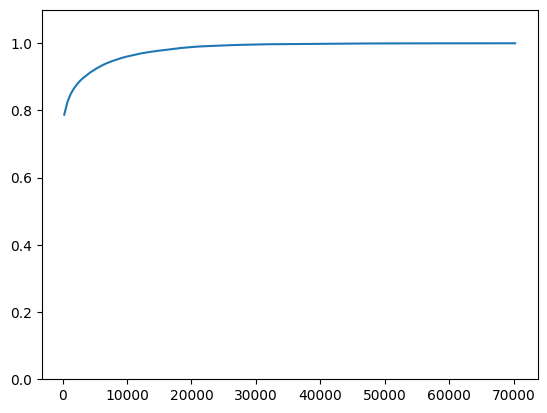

In [6]:
# Define the bins for the distribution
bins_min = 0
bins_max = df['stress_tensile'].max()
bins_step = 500
bins = np.arange(bins_min, bins_max, bins_step)


# Create a new dataframe for distribution analysis
distribution_df = pd.DataFrame(columns=['stress_tensile', 'quantity'])

# Populate the new dataframe with mean tensile stress and quantity information
for i in range(int(bins_max/bins_step)):
    lower_bound = i * bins_step
    upper_bound = lower_bound + bins_step
    subset = df[df['stress_tensile'].between(lower_bound, upper_bound, inclusive='left')]
    distribution_df.loc[i] = [i*bins_step + bins_step / 2, subset.shape[0]]

distribution_df['cumulative_sum'] = distribution_df['quantity'].cumsum()
print(distribution_df)

'''
count_below_500 = len(df[df['stress_tensile'] < 500])
count_below_1000 = len(df[df['stress_tensile'] < 1000])
print(f'Für debugging. Anzahl der Werte unter 500: {count_below_500}')
print(f'Für debugging. Anzahl der Werte unter 1000: {count_below_1000}')
'''

distribution_df.cumulative_sum = distribution_df.cumulative_sum / distribution_df.cumulative_sum.max()
plt.plot(distribution_df.stress_tensile, distribution_df.cumulative_sum)
plt.ylim(0,1.1)
# plt.xlim(0,70000)
plt.show()

Plotten über integrierte Funktion

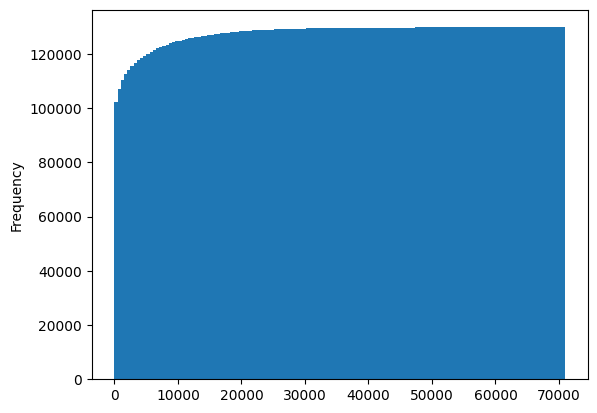

In [7]:
ax = df.stress_tensile.plot.hist(bins=141, cumulative=True)

# Auswerten einer einzelnen Scheibe bei z = 100 µm
Erstellen eines neuen Dataframes mit Werten von Gelenken in einzelner Scheibe in X-Y-Ebene

In [8]:
z_layer = 100   # z-position of the layer
z_layer_height = 10
z_min = z_layer - z_layer_height/2
z_max = z_layer + z_layer_height/2
df_layer = df[(df.pos_z >= z_min) & (df.pos_z < z_max)]
df_layer.describe()

,pos_x,pos_y,pos_z,stress_tensile,radius,radius_3d
count,7999.000000,7999.000000,7999.00000,7999.000000,7999.000000,7999.000000
mean,0.319599,13.434391,99.98100,1503.718257,149.822796,149.599612
std,119.793003,106.622259,2.90923,5076.371780,58.733299,58.761352
min,-264.814000,-276.395000,95.00020,0.000000,1.918896,7.541114
25%,-92.851500,-74.903850,97.41125,0.000000,107.533954,106.868348
50%,-2.543260,11.988400,99.94270,7.682500,152.831106,154.202135
75%,95.161700,96.651300,102.55050,324.281000,192.600570,191.689859
max,291.401000,302.184000,104.99800,68869.600000,303.081692,310.225050


Plotten der Spannungen innerhalb der Scheibe

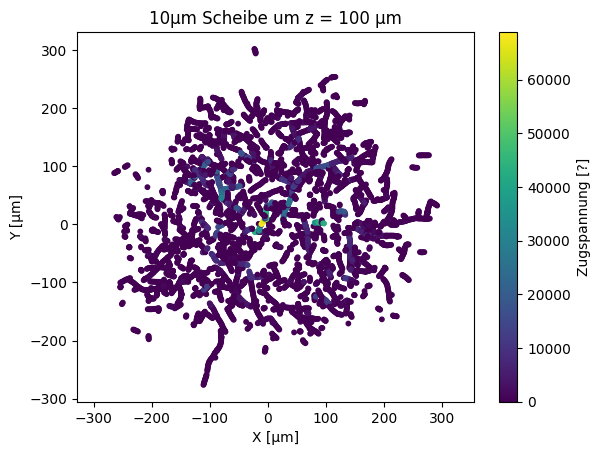

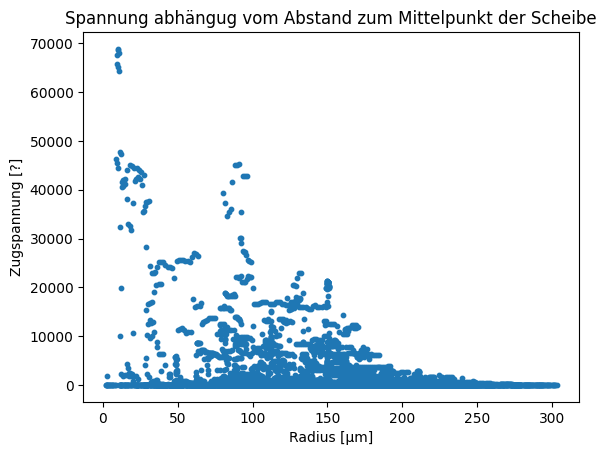

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_layer['pos_x'], df_layer['pos_y'], c=df_layer['stress_tensile'], cmap='viridis', s=10)
plt.colorbar(label='Zugspannung [?]')  # Add color bar for reference

# Add labels and title if needed
plt.xlabel('X [µm]')
plt.ylabel('Y [µm]')
plt.axis('equal')
plt.title('10µm Scheibe um z = 100 µm')

# Show the plot
plt.show()


plt.scatter(df_layer['radius'], df_layer['stress_tensile'],s=10)
plt.xlabel('Radius [µm]')
plt.ylabel('Zugspannung [?]')
plt.title('Spannung abhängug vom Abstand zum Mittelpunkt der Scheibe')
plt.show()

# Auswertung sämtlicher Gelenke
Plotten der Spannungen abhängig vom Abstand zum Schwerpunkt des  (Gesamtes Pellet)

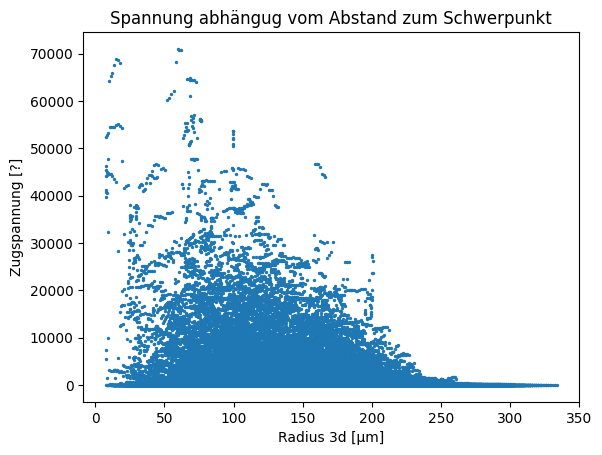

In [10]:
plt.scatter(df['radius_3d'], df['stress_tensile'],s=2)
plt.xlabel('Radius 3d [µm]')
plt.ylabel('Zugspannung [?]')
plt.title('Spannung abhängug vom Abstand zum Schwerpunkt')
plt.show()

Plotten aller Gelenke, deren Spannung mindestens 30% der maximalen Spannung entspricht.

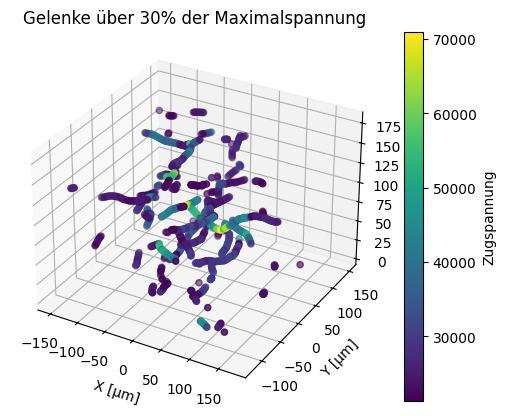

In [11]:

from mpl_toolkits.mplot3d import Axes3D  # Importing 3D axes for Matplotlib


df_high_stress = df[df.stress_tensile >= df.stress_tensile.max() *  0.3]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with pos_x, pos_y, pos_z as coordinates and stress_tensile as color
scatter = ax.scatter(df_high_stress['pos_x'], df_high_stress['pos_y'], df_high_stress['pos_z'], c=df_high_stress['stress_tensile'], cmap='viridis')

# Add labels
ax.set_xlabel('X [µm]')
ax.set_ylabel('Y [µm]')
ax.set_zlabel('Z [µm]')
ax.set_title('Gelenke über 30% der Maximalspannung')

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, label='Zugspannung')

# Show the plot
plt.show()


Berechnen der maximalen und mittleren Spannung abhängig von der X-Y-Position (gemittelt auf Raster mit 5µm-Schritten)

In [12]:
import numpy as np
from matplotlib.ticker import MaxNLocator
grid_min = -350
grid_max = 350
grid_spacing = 5
grid_number = (grid_max - grid_min) / grid_spacing

x_y_axis = np.linspace(grid_min, grid_max - grid_spacing, int(grid_number))
x, y = np.meshgrid(x_y_axis, x_y_axis)

stress_mean = np.full_like(x, np.nan)
stress_max = np.full_like(x, np.nan)


for i in range(len(x_y_axis) -1):
    for j in range(len(x_y_axis) -1):
        x_val = x[i, j]
        y_val = y[i, j]
        # stess cell = all stresses that are between x_j and x_j+1 and between y_i and y_i+1
        stress_cell = df.loc[((df['pos_x'] >= x[i, j]) & (df['pos_x'] < x[i, j+1]))
                        & ((df['pos_y'] >= y[i, j]) & (df['pos_y'] < y[i+1, j])), 'stress_tensile']
        # calulating mean and max stress for each cell of grid
        stress_mean[i, j] = stress_cell.mean()
        stress_max[i,j] = stress_cell.max()

#correct x and y so it refers to the middle of the cell
x = x + grid_spacing/2
y = y + grid_spacing/2

Plotten der mittleren Spannungen in X-Y-Ebene

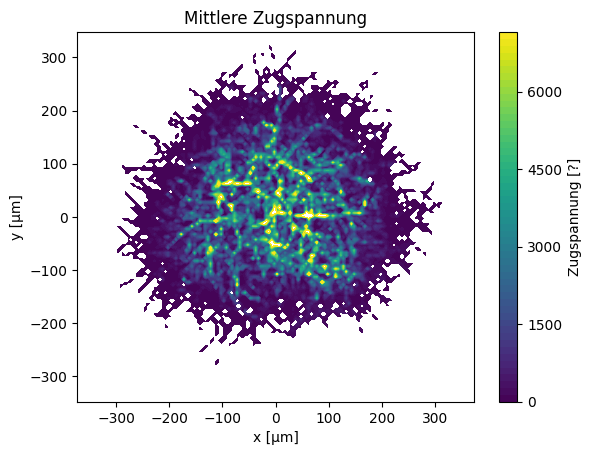

In [13]:
cbar_max_stress = np.nanmax(stress_mean)*0.33
levels = np.linspace(0, cbar_max_stress, 55)
fig, ax = plt.subplots()
plt.title('Mittlere Zugspannung')
plt.axis('equal')
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
contour = ax.contourf(x, y, stress_mean, levels=levels, cmap='viridis')
cbar = fig.colorbar(contour, ticks=MaxNLocator(nbins=6))
cbar.set_label('Zugspannung [?]')


Plotten der maximalen Spannungen in X-Y-Ebene

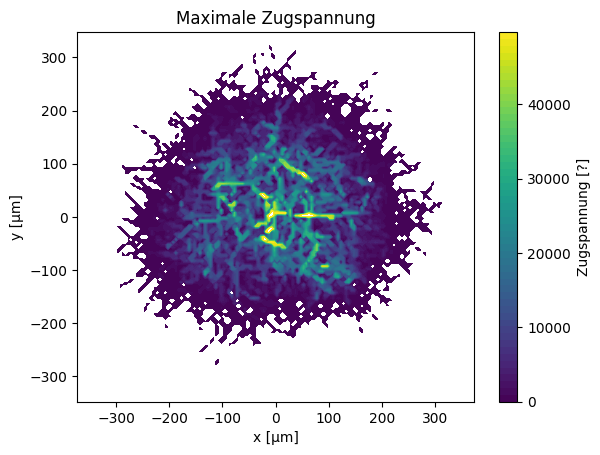

In [14]:
cbar_max_stress = np.nanmax(stress_max)*0.7
levels = np.linspace(0, cbar_max_stress, 55)
fig, ax = plt.subplots()
plt.title('Maximale Zugspannung')
plt.axis('equal')
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
contour = ax.contourf(x, y, stress_max, levels=levels, cmap='viridis')
cbar = fig.colorbar(contour, ticks=MaxNLocator(nbins=6))
cbar.set_label('Zugspannung [?]')


Und nochmal für die X-Z-Ebene

In [15]:
grid_min = -350
grid_max = 350
grid_spacing = 5
grid_number = (grid_max - grid_min) / grid_spacing

grid_z_min = 0
grid_z_max = 190
grid_z_number = (grid_z_max - grid_z_min) / grid_spacing

x_y_axis = np.linspace(grid_min, grid_max - grid_spacing, int(grid_number))
z_axis = np.linspace(grid_z_min, grid_z_max - grid_spacing, int(grid_z_number))
x, z = np.meshgrid(x_y_axis, z_axis)

stress_mean = np.full_like(x, np.nan)
stress_max = np.full_like(x, np.nan)


for i in range(len(z_axis) -1):
    for j in range(len(x_y_axis) -1):
        x_val = x[i, j]
        z_val = z[i, j]
        stress_cell = df.loc[((df['pos_x'] >= x[i, j]) & (df['pos_x'] < x[i, j+1]))
                        & ((df['pos_z'] >= z[i, j]) & (df['pos_z'] < z[i+1, j])), 'stress_tensile']
        # calulating mean and max stress for each cell of grid
        stress_mean[i, j] = stress_cell.mean()
        stress_max[i,j] = stress_cell.max()

#correct x and y so it refers to the middle of the cell
x = x + grid_spacing/2
z = z + grid_spacing/2

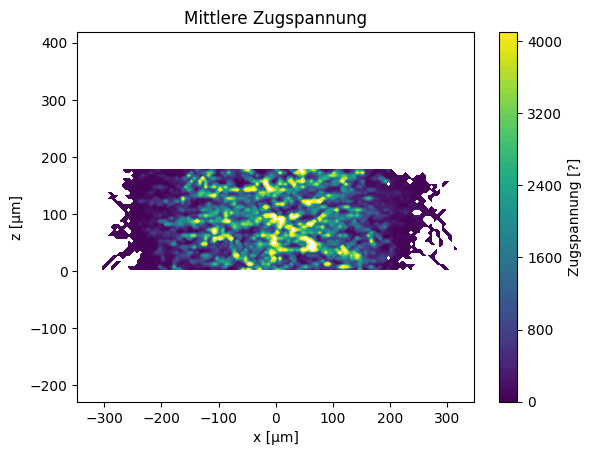

In [16]:
cbar_max_stress = np.nanmax(stress_mean)*0.33
levels = np.linspace(0, cbar_max_stress, 55)
fig, ax = plt.subplots()
plt.title('Mittlere Zugspannung')
plt.axis('equal')
plt.xlabel('x [µm]')
plt.ylabel('z [µm]')
contour = ax.contourf(x, z, stress_mean, levels=levels, cmap='viridis')
cbar = fig.colorbar(contour, ticks=MaxNLocator(nbins=6))
cbar.set_label('Zugspannung [?]')

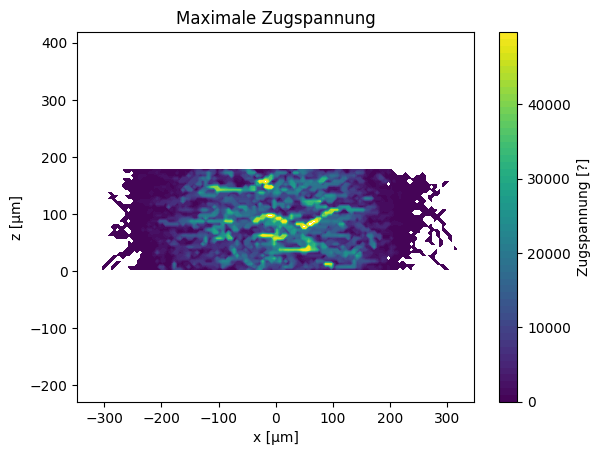

In [17]:
cbar_max_stress = np.nanmax(stress_max)*0.7
levels = np.linspace(0, cbar_max_stress, 55)
fig, ax = plt.subplots()
plt.title('Maximale Zugspannung')
plt.axis('equal')
plt.xlabel('x [µm]')
plt.ylabel('z [µm]')
contour = ax.contourf(x, z, stress_max, levels=levels, cmap='viridis')
cbar = fig.colorbar(contour, ticks=MaxNLocator(nbins=6))
cbar.set_label('Zugspannung [?]')

In [18]:
df.describe()

,pos_x,pos_y,pos_z,stress_tensile,radius,radius_3d
count,129837.000000,129837.000000,129837.000000,129837.000000,129837.000000,129837.000000
mean,-1.951587,13.737188,89.815286,1322.631754,146.948330,155.741460
std,118.888847,103.857563,48.565134,4253.038969,59.325323,54.990312
min,-310.038000,-276.395000,3.144430,0.000000,0.963317,7.541114
25%,-95.825300,-67.860600,48.552600,0.000000,104.097577,114.764272
50%,-1.619870,9.589480,89.692600,5.732920,149.571616,156.957527
75%,91.813900,92.865500,130.369000,225.836000,190.866378,196.163496
max,315.437000,328.369000,177.016000,70999.700000,337.533995,333.717443


# Spannungen innerhalb einzelner Kugelschalen
Untersuchung der mittleren und maximalen Spannungen abhängig von der Kugelschale mit dem Schwerpunkt des Pellets als Mittelpunkt

Erstellen von Intervallen für die Kugelschalen und Berechnung der mittleren und maximalen Spannung, sowie der Anzahl der Gelenke pro Schale

In [19]:
import math

bins_min = 0
bins_step = 5

# find max of radius_3d and round to next whole bins_step
bins_max = math.ceil(df['radius_3d'].max() / bins_step) * bins_step
bins = np.arange(bins_min, bins_max, bins_step)

# Create a new column 'radius_3d_bin' with bin labels
df['radius_3d_bin'] = pd.cut(df['radius_3d'], bins=bins, right=False)

# Calculate max stress_tensile for each radius_3d bin
max_stress_by_bin = df.groupby('radius_3d_bin', observed=True)['stress_tensile'].max().reset_index()
max_stress_by_bin.rename(columns={'stress_tensile' : 'stress_tensile_max'}, inplace=True)

# Calculate mean stress_tensile for each radius_3d bin
mean_stress_by_bin = df.groupby('radius_3d_bin', observed=True)['stress_tensile'].mean().reset_index()
mean_stress_by_bin.rename(columns={'stress_tensile' : 'stress_tensile_mean'}, inplace=True)

# count the values (joints) per bin
count_by_bin = df['radius_3d_bin'].value_counts().reset_index()
count_by_bin['midpoint'] = count_by_bin['radius_3d_bin'].apply(lambda interval: (interval.left + interval.right) / 2)
# count_by_bin.columns = ['radius_3d_bin', 'count']
count_by_bin = count_by_bin.sort_values(by='radius_3d_bin').reset_index(drop=True)

df_by_bin = pd.merge(count_by_bin, max_stress_by_bin, on='radius_3d_bin', how='outer')
df_by_bin = pd.merge(df_by_bin, mean_stress_by_bin, on='radius_3d_bin', how='outer')
df_by_bin


,radius_3d_bin,count,midpoint,stress_tensile_max,stress_tensile_mean
0,"[0, 5)",0,2.5,NaN,NaN
1,"[5, 10)",28,7.5,64308.4000,28832.928048
2,"[10, 15)",58,12.5,68869.6000,11847.937600
3,"[15, 20)",92,17.5,68611.3000,6041.114726
4,"[20, 25)",199,22.5,42238.4000,3989.048587
...,...,...,...,...,...
61,"[305, 310)",58,307.5,33.9451,11.209870
62,"[310, 315)",33,312.5,26.8313,13.606905
63,"[315, 320)",17,317.5,23.1669,15.073590
64,"[320, 325)",10,322.5,21.6650,10.684788


Plotten der mittleren Spannungen und Anzahl der Gelenke pro Kugelschale

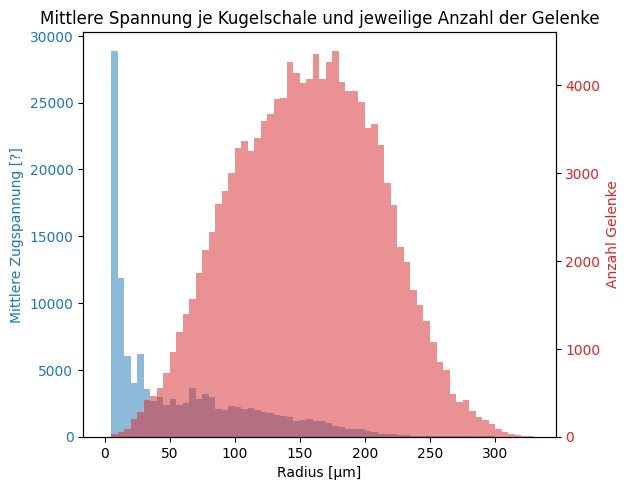

In [20]:
# Specify the width of the bars
bar_width = 5  # Adjust this value as needed

# Plot mean stress_tensile
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Radius [µm]')
ax1.set_ylabel('Mittlere Zugspannung [?]', color=color)
ax1.bar(df_by_bin['midpoint'], df_by_bin['stress_tensile_mean'], alpha=0.5, color=color, width=bar_width)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Anzahl Gelenke', color=color)
ax2.bar(df_by_bin['midpoint'], df_by_bin['count'], alpha=0.5, color=color, width=bar_width)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Mittlere Spannung je Kugelschale und jeweilige Anzahl der Gelenke')
plt.show()

Plotten der maximalen Spannungen und Anzahl der Gelenke pro Kugelschale

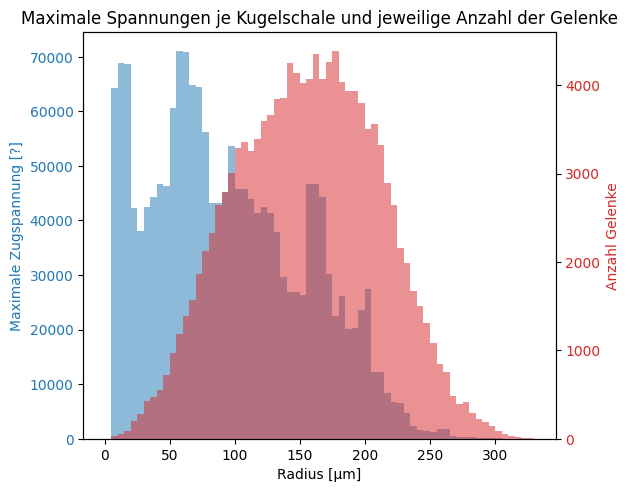

In [21]:
# Specify the width of the bars
bar_width = 5  # Adjust this value as needed

# Plot max stress_tensile
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Radius [µm]')
ax1.set_ylabel('Maximale Zugspannung [?]', color=color)
ax1.bar(df_by_bin['midpoint'], df_by_bin['stress_tensile_max'], alpha=0.5, color=color, width=bar_width)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Anzahl Gelenke', color=color)
ax2.bar(df_by_bin['midpoint'], df_by_bin['count'], alpha=0.5, color=color, width=bar_width)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Maximale Spannungen je Kugelschale und jeweilige Anzahl der Gelenke')
plt.show()

# Erweiterung, da Kugelschalen durch Platten begrenzt sind
Korrektur der vorherigen Auswertung durch Darstellung der Gelenke pro Volumen.  
Dabei bezogen auf die Kugelschale im Abstand des Radius und unter Berücksichtigung,  
dass Kugelsegmente außerhalb der Platte (blau) abgeschnitten werden.  

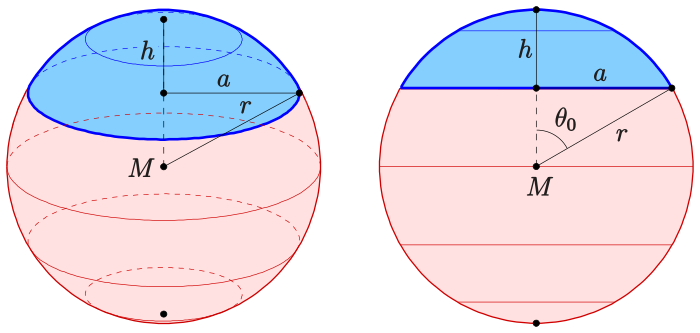

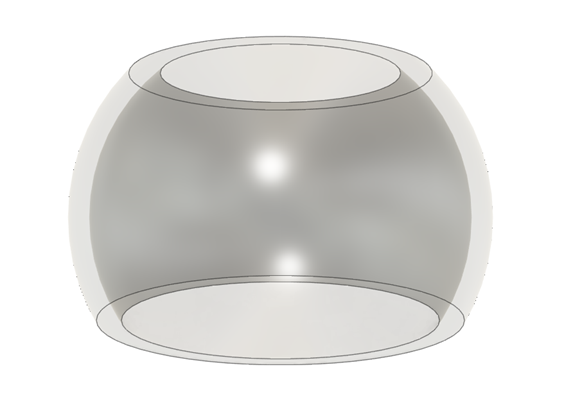

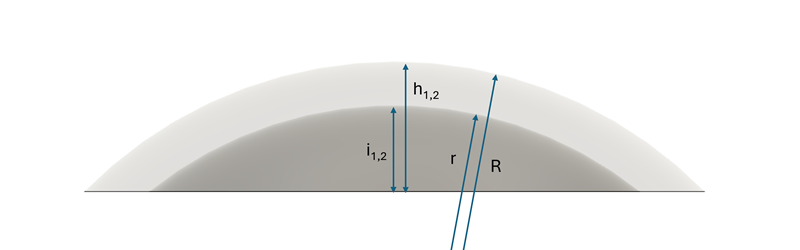

In [22]:
from IPython.display import display
from PIL import Image
images = ['abbildungen/kugel-kappe.png',
          'abbildungen/kugelschale_schnitt.png',
          'abbildungen/kugelsegment.png']
for image in images:
    img = Image.open(image)
    display(img)


Berechnung der tatsächlichen Kugelschalenvolumina zwischen den Platten und der Gelenke pro Kugelschale

In [23]:
import math
z_mean = df.pos_z.mean()
z_plate_min = 0
z_plate_max = 180


def sphere_volume(interval):
    R = interval.right # outer radius
    r = interval.left # inner radius
    volume = 4/3 * math.pi * (R**3 - r**3) # calculate colume of sphere shell
    h1 = z_mean + R - z_plate_max # positive if outer radius higher than plate

    if h1 > 0: # cut shell segment that is higher than plate
        i1 =  z_mean + r - z_plate_max
        if i1 < 0:
            i1=0
        volume -= math.pi/3 * (h1 * (3*R - h1) - i1**2 * (3*r - i1))
        # V = π/3 * [ h² * (3R-h) - i² * (3r-i) ] 
        # https://rechneronline.de/pi/kugelschalensegment.php
    h2 = -z_mean + R + z_plate_min
    if h2 > 0: # cut shell segment that is lower than plate
        i2 = -z_mean + r + z_plate_min
        if i2 < 0:
            i2=0
        volume -= math.pi/3 * (h2 * (3*R - h2) - i2**2 * (3*r - i2))
    return volume

df_by_bin['sphere_volume'] = df_by_bin['radius_3d_bin'].apply(sphere_volume).astype(float)
df_by_bin['count_per_volume'] = df_by_bin['count'] / df_by_bin['sphere_volume']
df_by_bin

,radius_3d_bin,count,midpoint,stress_tensile_max,stress_tensile_mean,sphere_volume,count_per_volume
0,"[0, 5)",0,2.5,NaN,NaN,5.235988e+02,0.000000e+00
1,"[5, 10)",28,7.5,64308.4000,28832.928048,3.665191e+03,7.639437e-03
2,"[10, 15)",58,12.5,68869.6000,11847.937600,9.948377e+03,5.830097e-03
3,"[15, 20)",92,17.5,68611.3000,6041.114726,1.937315e+04,4.748839e-03
4,"[20, 25)",199,22.5,42238.4000,3989.048587,3.193953e+04,6.230525e-03
...,...,...,...,...,...,...,...
61,"[305, 310)",58,307.5,33.9451,11.209870,7.338354e+07,7.903680e-07
62,"[310, 315)",33,312.5,26.8313,13.606905,7.776857e+07,4.243359e-07
63,"[315, 320)",17,317.5,23.1669,15.073590,8.232305e+07,2.065035e-07
64,"[320, 325)",10,322.5,21.6650,10.684788,8.705010e+07,1.148764e-07


Plotten der maximalen Spannungen und Anzahl der Gelenke pro Kugelschale

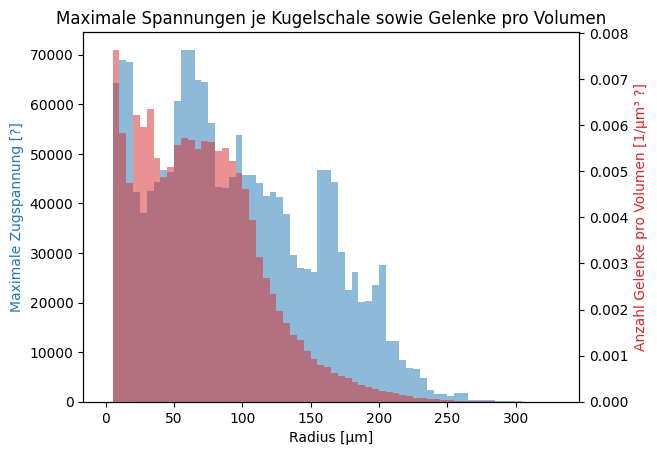

In [24]:
# Specify the width of the bars
bar_width = 5  # Adjust this value as needed

# Plot max stress_tensile
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Radius [µm]')
ax1.set_ylabel('Maximale Zugspannung [?]', color=color)
ax1.bar(df_by_bin['midpoint'], df_by_bin['stress_tensile_max'], alpha=0.5, color=color, width=bar_width)
#ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Anzahl Gelenke pro Volumen [1/µm³ ?]', color=color)
ax2.bar(df_by_bin['midpoint'], df_by_bin['count_per_volume'], alpha=0.5, color=color, width=bar_width)
#ax2.tick_params(axis='y', labelcolor=color)

plt.title('Maximale Spannungen je Kugelschale sowie Gelenke pro Volumen')
plt.show()